# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 16 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: C:\Users\Saro\Downloads\Cauchy.csv

  0%|          | 0.00/18.7k [00:00<?, ?B/s]
100%|##########| 18.7k/18.7k [00:00<00:00, 8.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: C:\Users\Saro\Downloads\Weibull.csv

  0%|          | 0.00/17.9k [00:00<?, ?B/s]
100%|##########| 17.9k/17.9k [00:00<00:00, 5.48MB/s]


In [1]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на отрезке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле `Cauchy.csv` находятся координаты точек
пересечения лучей с поверхностью Земли.

In [72]:
cauchy_sample = pd.read_csv("Cauchy.csv")["sample"].values

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


In [74]:
from scipy.stats import cauchy

Посмотрим на распределение точек:

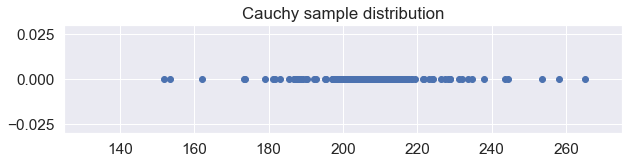

In [77]:
plt.figure(figsize=(10, 2))
plt.title('Cauchy sample distribution')
plt.scatter(cauchy_sample, [0]*len(cauchy_sample))
plt.xlim(125, 275)
plt.show()

In [78]:
def log_of_function_of_maximum_likelyhood_1(x_0, sample):
    ans = 0
    for element in sample:
        ans += np.log(sps.cauchy.pdf(element, loc=x_0))
    return ans


def find_optimal_x_0(left_limit, right_limit, number_of_points, sample):
    grid = np.linspace(left_limit, right_limit, number_of_points)
    optimal_x_0 = left_limit
    best_value = log_of_function_of_maximum_likelyhood_1(left_limit, sample)
    for x_0 in grid:
        current_value = log_of_function_of_maximum_likelyhood_1(x_0, sample)
        if current_value > best_value:
            optimal_x_0 = x_0
            best_value = current_value
    return optimal_x_0

In [79]:
single_precision_x_0 = find_optimal_x_0(-1000, 1000, 2001, cauchy_sample[:10])

In [80]:
double_precision_x_0 = find_optimal_x_0(100, 300, 2001, cauchy_sample[:100])

In [82]:
print(f'my first estimation = {single_precision_x_0}')
print(f'my second estimation = {double_precision_x_0}')

my first estimation = 209.0
my second estimation = 207.9


Сравните полученные результаты с `sps.cauchy.fit`

In [83]:
print(f'python\'s estimation = {sps.cauchy.fit(cauchy_sample[:100])[0]}')

python's estimation = 207.87882548487846


**Вывод**. Итак, оценки полученные ручным перебором и оценка питона мало отличимы.

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [84]:
weibull_sample = np.loadtxt("Weibull.csv")

Постройте гистограмму выборки. Не забудьте подобрать `xlim`, `ylim` и параметр `bins`, чтобы гистограмма была информативна

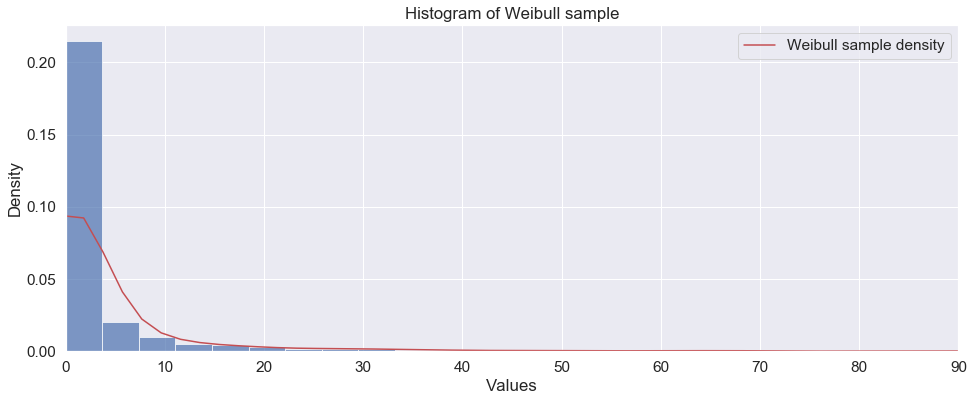

In [87]:
plt.figure(figsize=(16, 6))
plt.title('Histogram of Weibull sample')
plt.hist(weibull_sample, bins=100, density=1, alpha=0.7)
sns.kdeplot(weibull_sample, color='r', label='Weibull sample density')
plt.xlim(0, 90)
plt.xlabel('Values')
plt.legend(loc=1)
plt.show()

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$


Однако здесь мы сталкиваемся с проблемой: в нашей выборке есть нули. А логарифм нуля, как известно, не определен. Мы предлагаем вам сравнить два способа рещения этой проблемы:

1. Отбросить нули до построения эмпирической функции распределения $\hat{F}(x)$
2. Построить эмпирическую функцию, а затем учитывать только те точки, x-координата которых положительна.

Для первого способа отфильтруйте выборку в ячейке ниже

In [88]:
weibull_nonzero_sample = weibull_sample[weibull_sample != 0]

Для каждого способа подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. 

In [89]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_1 = ECDF(weibull_nonzero_sample)
ecdf_2 = ECDF(weibull_sample)

x_1 = np.log(weibull_nonzero_sample)
x_2 = np.log(weibull_sample)

y_1 = np.log(-np.log(1 - ecdf_1(weibull_nonzero_sample)))
y_2 = np.log(-np.log(1 - ecdf_2(weibull_sample)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


Постройте график (`plt.scatter`) для первого способа красным цветом, а для второго — синим. Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла.

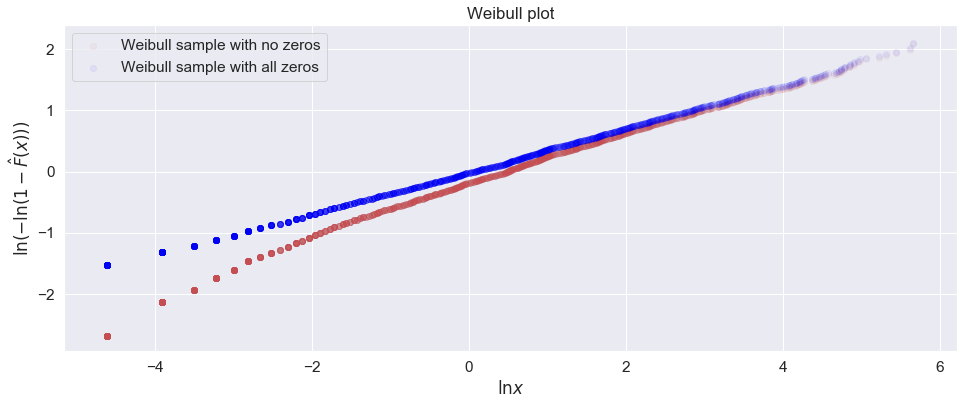

In [92]:
plt.figure(figsize=(16, 6))
plt.title('Weibull plot')
plt.scatter(x_1, y_1,
            alpha=0.05, color='r', label='Weibull sample with no zeros')
plt.scatter(x_2, y_2,
            alpha=0.05, color='blue', label='Weibull sample with all zeros')
plt.xlabel(r'$\ln x$')
plt.ylabel(r'$\ln(-\ln(1-\hatF(x)))$')
plt.legend()
plt.show()

Также посмострим на эмпирические и настоящую функции распределения (потом станет ясно откуда взялся параметр $\gamma=0.41$).

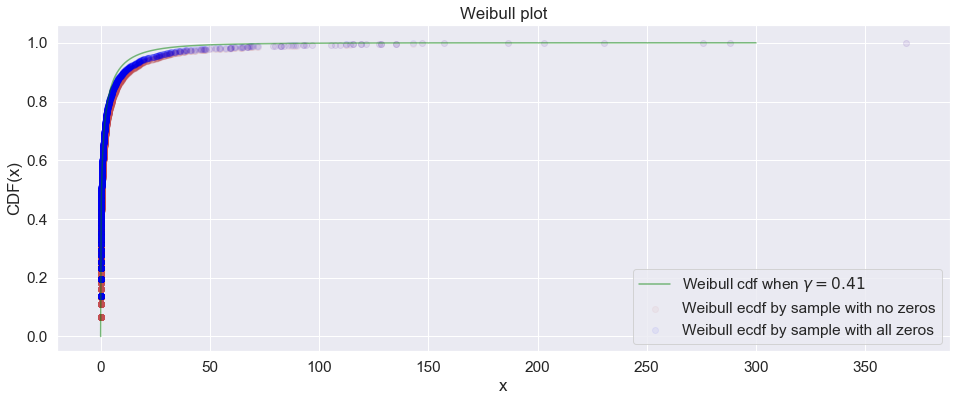

In [94]:
plt.figure(figsize=(16, 6))
plt.title('Weibull plot')
plt.scatter(weibull_nonzero_sample, ecdf_1(weibull_nonzero_sample),
            alpha=0.05, color='r', label='Weibull ecdf by sample with no zeros')
plt.scatter(weibull_sample, ecdf_2(weibull_sample),
            alpha=0.05, color='blue', label='Weibull ecdf by sample with all zeros')
grid = np.linspace(0, 300, 1000)
plt.plot(grid, 1 - np.exp(-(grid ** 0.41)), color='green', alpha=0.5, label=r'Weibull cdf when $\gamma=0.41$')
plt.xlabel(r'x')
plt.ylabel(r'CDF(x)')
plt.legend()
plt.show()

Сделайте вывод. Какой способ вам кажется более правильным и почему?

**Вывод**. Думаю нет особой разницы. Графики ведь практически одинаковы.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

In [95]:
def weibull_pdf(gamma, x):
    return gamma * (x ** (gamma - 1)) * np.exp(-(x ** gamma))


def log_of_function_of_maximum_likelyhood_2(log_of_gamma, sample):
    ans = 0
    for element in sample:
        ans += np.log(weibull_pdf(10 ** log_of_gamma, element))
    return ans


def find_optimal_gamma(left_limit, right_limit, number_of_points, sample):
    grid = np.linspace(left_limit, right_limit, number_of_points)
    log_of_optimal_gamma = left_limit
    best_value = log_of_function_of_maximum_likelyhood_2(left_limit, sample)
    for log_of_gamma in grid:
        current_value = log_of_function_of_maximum_likelyhood_2(log_of_gamma, sample)
        if current_value > best_value:
            log_of_optimal_gamma = log_of_gamma
            best_value = current_value
    return log_of_optimal_gamma

In [96]:
gamma_by_first_4_years = 10 ** find_optimal_gamma(-2, 2, 4001, weibull_sample[:1461][weibull_sample[:1461] != 0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [97]:
gamma_by_all_10_years = 10 ** find_optimal_gamma(-2, 2, 4001, weibull_nonzero_sample)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [98]:
print(f'gamma by first 4 years is {gamma_by_first_4_years}')
print(f'gamma by all 10 years is {gamma_by_all_10_years}')

gamma by first 4 years is 0.41783036664662176
gamma by all 10 years is 0.4102041029866068


Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

In [99]:
gamma_by_python = sps.weibull_min.fit(weibull_nonzero_sample, fscale=1, floc=0)[0]
print(f'gamma by python is {gamma_by_python}')

gamma by python is 0.41025390624999947


Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$) для того метода, который вам кажется более правильным. Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

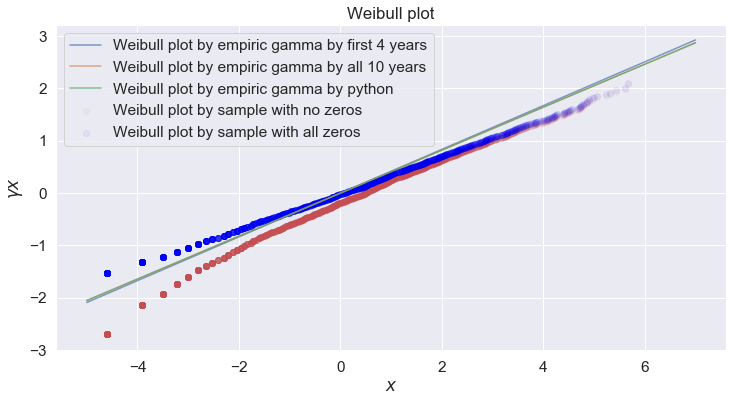

In [100]:
gammas = [
    (gamma_by_first_4_years, 'gamma by first 4 years'),
    (gamma_by_all_10_years, 'gamma by all 10 years'),
    (gamma_by_python, 'gamma by python')
]

x = np.linspace(-5, 7, 130)
plt.figure(figsize=(12, 6))
plt.title('Weibull plot')
for gamma, label in gammas:
    plt.plot(x, gamma * x, label='Weibull plot by empiric '+label, alpha=0.7)
plt.scatter(x_1, y_1, alpha=0.05, color='r', label='Weibull plot by sample with no zeros')
plt.scatter(x_2, y_2, alpha=0.05, color='blue', label='Weibull plot by sample with all zeros')
plt.xlabel(r'$x$')
plt.ylabel(r'$\gamma x$')
plt.legend()
plt.show()

**Вывод**. Полученные оценки параметра $\gamma$ хорошо приближают истинное значение.

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [31]:
theta = 3
N = 1000

normal_sample = sps.norm.rvs(loc=0, scale=theta, size=N)
uniform_sample = sps.uniform.rvs(loc=0, scale=theta, size=N)
gamma_sample = sps.gamma.rvs(0.999, loc=theta, scale=theta, size=N)

In [34]:
normal_theta_estimation = (np.cumsum(normal_sample ** 2) / (np.arange(N) + 1)) ** 0.5
uniform_theta_estimation = 2 * np.cumsum(uniform_sample) / (np.arange(N) + 1)
gamma_theta_estimation = np.cumsum(gamma_sample) / (np.arange(N) + 1) / 2

In [35]:
error_of_normal_estimation = np.cumsum(np.abs(normal_theta_estimation - theta)) / (np.arange(N) + 1)
error_of_uniform_estimation = np.cumsum(np.abs(uniform_theta_estimation - theta)) / (np.arange(N) + 1)
error_of_gamma_estimation = np.cumsum(np.abs(gamma_theta_estimation - theta)) / (np.arange(N) + 1)

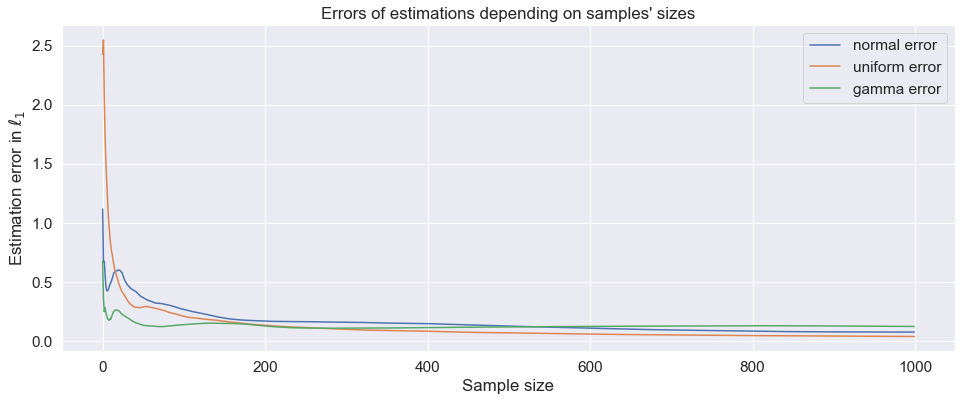

In [38]:
plt.figure(figsize=(16, 6))

plt.plot(error_of_normal_estimation, label='normal error')
plt.plot(error_of_uniform_estimation, label='uniform error')
plt.plot(error_of_gamma_estimation, label='gamma error')

plt.xlabel('Sample size')
plt.ylabel(r'Estimation error in $\ell_1$')
plt.title('Errors of estimations depending on samples\' sizes')
plt.legend()
plt.show()

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [40]:
from random import randrange

In [41]:
K_range = [10, 50] + list(range(100, 1001, 100))
K_dict = dict(zip(K_range, list(range(len(K_range)))))

In [69]:
normal_mean_variances = len(K_range) * [0]

for K in K_range:
    noemal_bootstrap_samples = K * [np.array(N * [0])]
    normal_empiric_variances = K * [0]
    for i in range(K):
        for j in range(N):
            normal_bootstrap_samples[i][j] = normal_sample[randrange(N)]
        normal_empiric_variances[i] = sum(normal_bootstrap_samples[i] ** 2) / N - sum(normal_bootstrap_samples[i]) ** 2 / (N * N)
    normal_mean_variances[K_dict[K]] = sum(normal_empiric_variances) / K

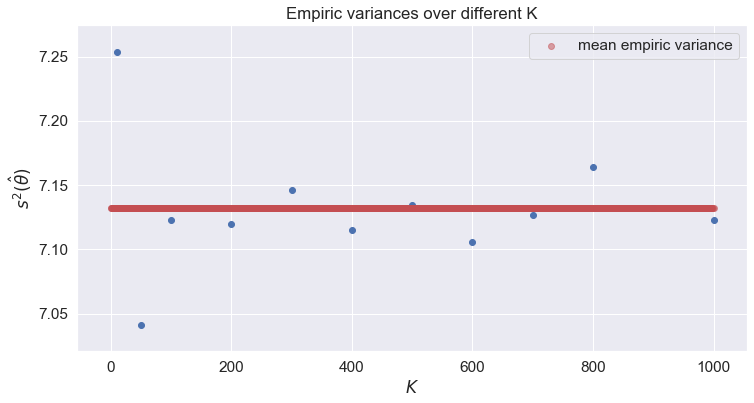

In [70]:
plt.figure(figsize=(12, 6))
plt.scatter(K_range, normal_mean_variances)
grid = np.linspace(0, N, N + 1)
plt.scatter(grid, [sum(normal_mean_variances) / len(K_range)] * (N + 1), color='r', alpha=0.5, label='mean empiric variance')
plt.title('Normal empiric variances over different K')
plt.xlabel(r'$K$')
plt.ylabel(r'$s^2(\hat\theta)$')
plt.legend()
plt.show()

In [44]:
uniform_mean_variances = len(K_range) * [0]

for K in K_range:
    uniform_bootstrap_samples = K * [np.array(N * [0])]
    uniform_empiric_variances = K * [0]
    for i in range(K):
        for j in range(N):
            uniform_bootstrap_samples[i][j] = uniform_sample[randrange(N)]
        uniform_empiric_variances[i] = sum(uniform_bootstrap_samples[i] ** 2) / N - sum(uniform_bootstrap_samples[i]) ** 2 / (N * N)
    uniform_mean_variances[K_dict[K]] = sum(uniform_empiric_variances) / K

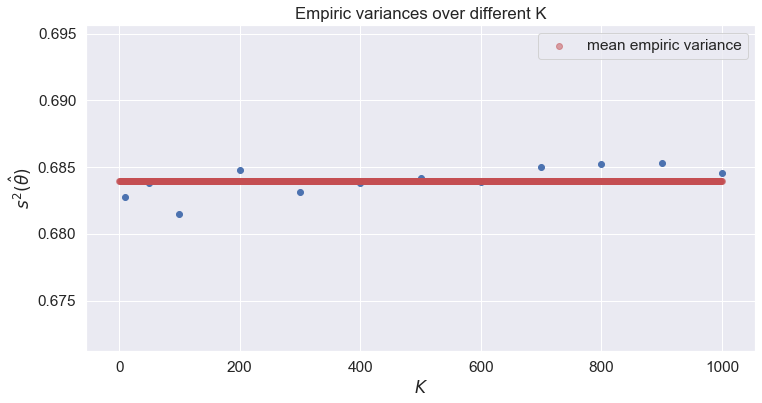

In [60]:
plt.figure(figsize=(12, 6))
plt.scatter(K_range, uniform_mean_variances)
grid = np.linspace(0, N, N + 1)
plt.scatter(grid, [sum(uniform_mean_variances) / len(K_range)] * (N + 1), color='r', alpha=0.5, label='mean empiric variance')
plt.title('Uniform empiric variances over different K')
plt.xlabel(r'$K$')
plt.ylabel(r'$s^2(\hat\theta)$')
plt.legend()
plt.show()

In [64]:
gamma_mean_variances = len(K_range) * [0]

for K in K_range:
    gamma_bootstrap_samples = K * [np.array(N * [0])]
    gamma_empiric_variances = K * [0]
    for i in range(K):
        for j in range(N):
            gamma_bootstrap_samples[i][j] = gamma_sample[randrange(N)]
        gamma_empiric_variances[i] = sum(gamma_bootstrap_samples[i] ** 2) / N - sum(gamma_bootstrap_samples[i]) ** 2 / (N * N)
    gamma_mean_variances[K_dict[K]] = sum(gamma_empiric_variances) / K

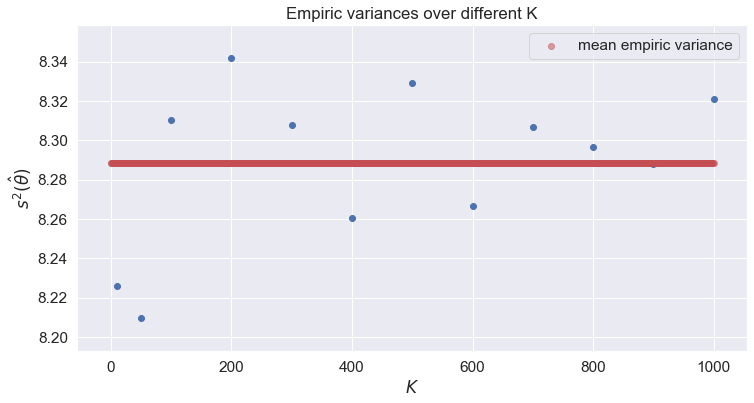

In [65]:
plt.figure(figsize=(12, 6))
plt.scatter(K_range, gamma_mean_variances)
grid = np.linspace(0, N, N + 1)
plt.scatter(grid, [sum(gamma_mean_variances) / len(K_range)] * (N + 1), color='r', alpha=0.5, label='mean empiric variance')
plt.title('Gamma empiric variances over different K')
plt.xlabel(r'$K$')
plt.ylabel(r'$s^2(\hat\theta)$')
plt.legend()
plt.show()